# Comparative Graphs - Common KOS bt 3

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
import json

In [32]:
def create_dict(filename):
    with open(filename, "r") as file:
        dictionary = json.load(file)
        dictionary2 = dict(sorted(dictionary.items()))
    return dictionary2

def get_sample_dict(dictionary, sample, base_1000000 = False):
    sample_dict = {}
    for ko, dict in dictionary.items():
        if base_1000000 == True:
            sample_dict[ko] = float((dict[sample])*1000000)
        else:
            sample_dict[ko] = dict[sample]
    return sample_dict

def get_ko_list(dictionary, sample):
    ko_list = []
    sample_dict = get_sample_dict(dictionary, sample)
    for ko, abun in sample_dict.items():
        if abun != 0:
            ko_list.append(ko)
    return ko_list

def get_common_ko(list1, list2, list3):
    set1 = set(list1)
    set2 = set(list2)
    set3 = set(list3)
    
    intersection = set1.intersection(set2, set3)
    
    return list(intersection)


def merge_dicts_common(dict1:dict, dict2:dict, common_list):
    merged_dict = {}
    #count = 0
    for ko in common_list:
        #if ko != 'UNMAPPED':
        merged_dict[ko] = [dict1[ko], dict2[ko]]
    return merged_dict

def get_xy(dict):
    xy = list(dict.values()) 
    x_list = []
    y_list = []
    # xy_list = []
    for x, y in xy:
        x_list.append(x)
        y_list.append(y)
    #     if x!=0 and y!=0:
    #         xy_list.append([x,y])
    # xy_list.sort(reverse=True)
    
    return x_list, y_list #, xy_list

In [33]:
ko_eggnog_file = '/Users/lucia/Desktop/TFM/scripts/final/new_tpm_results/ko_abundance.json'
tm_eggnog_file = '/Users/lucia/Desktop/TFM/scripts/final/new_tm_results/ko_abundance.json'
noun_eggnog_file = '/Users/lucia/Desktop/TFM/scripts/final/new_tm_results/ko_abundance.json'


ko_squeeze_file = '/Users/lucia/Desktop/TFM/scripts/final/squeeze_results/ko_abundance.json'

ko_humann_file = '/Users/lucia/Desktop/TFM/scripts/final/humann_results/ko_abundance.json'
my_humann_file = '/Users/lucia/Desktop/TFM/scripts/final/my_humann_results/ko_abundance.json'
noun_humann_file = '/Users/lucia/Desktop/TFM/scripts/final/humann_no_unmapped_results/ko_abundance.json'

tm_narrowest_eggnog_file = '/Users/lucia/Desktop/TFM/scripts/final/narrowest_tm_results/ko_abundance.json'
narrowest_eggnog_file = '/Users/lucia/Desktop/TFM/scripts/final/narrowest_tpm_results/ko_abundance.json'

In [34]:
rpkm_eggnog_dict = create_dict(ko_eggnog_file)
tm_eggnog_dict = create_dict(tm_eggnog_file)
tm_narrowest_eggnog_dict = create_dict(tm_narrowest_eggnog_file)
narrowest_eggnog_dict = create_dict(narrowest_eggnog_file)
noun_eggnog_dict = create_dict(noun_eggnog_file)

ko_squeeze_dict = create_dict(ko_squeeze_file)

ko_humann_dict = create_dict(ko_humann_file)
my_humann_dict = create_dict(my_humann_file)
noun_humann_dict = create_dict(noun_humann_file)


In [35]:
s0505_0101_rpkm_eggnog = get_sample_dict(rpkm_eggnog_dict, '0505-0101')
s0505_0101_tm_eggnog = get_sample_dict(tm_eggnog_dict, '0505-0101')
s0505_0101_tm_narrowest_eggnog = get_sample_dict(tm_narrowest_eggnog_dict, '0505-0101')
s0505_0101_narrowest_eggnog = get_sample_dict(narrowest_eggnog_dict, '0505-0101')
s0505_0101_noun_eggnog = get_sample_dict(noun_eggnog_dict, '0505-0101', True)

s0505_0101_squeeze = get_sample_dict(ko_squeeze_dict, '0505-0101', True)

s0505_0101_humann = get_sample_dict(ko_humann_dict, '0505-0101', True)
s0505_0101_my_humann = get_sample_dict(my_humann_dict, '0505-0101', True)
s0505_0101_noun_humann = get_sample_dict(noun_humann_dict, '0505-0101', True)

In [36]:
s0505_0101_humann_list = get_ko_list(ko_humann_dict, '0505-0101')
s0505_0101_eggnog_list = get_ko_list(rpkm_eggnog_dict, '0505-0101')
s0505_0101_squeeze_list = get_ko_list(ko_squeeze_dict, '0505-0101')
common_list = get_common_ko(s0505_0101_humann_list, s0505_0101_eggnog_list, s0505_0101_squeeze_list)

Text(0.5, 0, 'Squeeze')

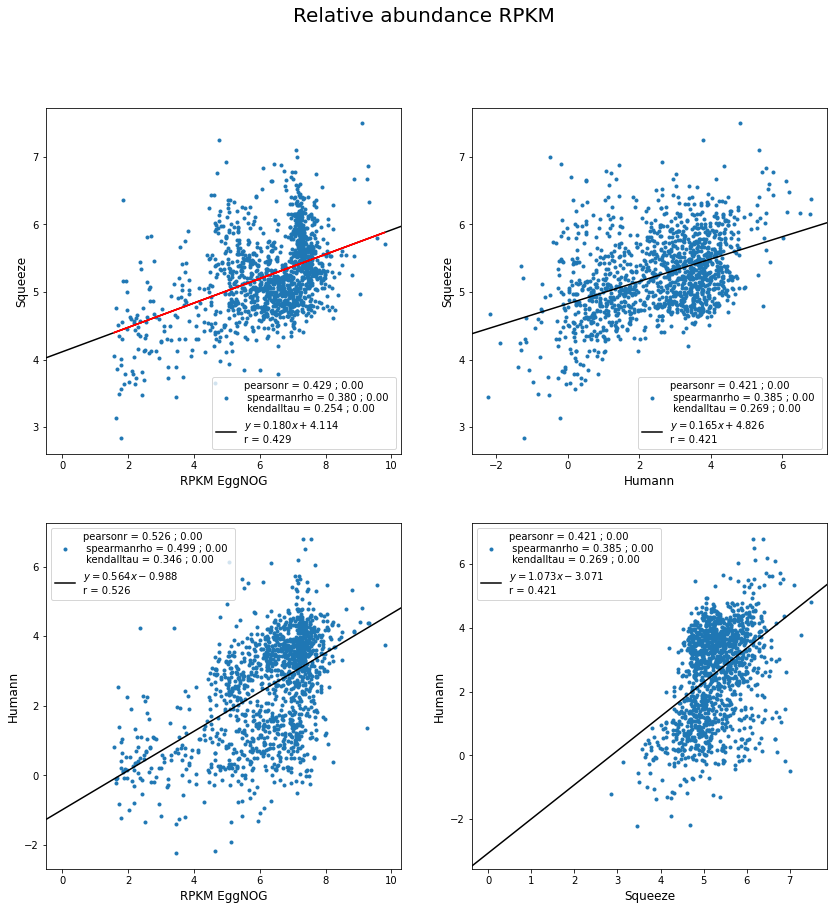

In [37]:
s0505_0101_eggnog_squeeze = merge_dicts_common(s0505_0101_rpkm_eggnog, s0505_0101_squeeze, common_list)
s0505_0101_eggnog_humann = merge_dicts_common(s0505_0101_rpkm_eggnog, s0505_0101_humann, common_list)
s0505_0101_humann_squeeze = merge_dicts_common(s0505_0101_humann, s0505_0101_squeeze, common_list)
s0505_0101_squeeze_humann = merge_dicts_common(s0505_0101_squeeze, s0505_0101_humann, common_list)

x_eggsq,y_eggsq = get_xy(s0505_0101_eggnog_squeeze)
x_egghu, y_egghu = get_xy(s0505_0101_eggnog_humann) 
x_husq, y_husq = get_xy(s0505_0101_humann_squeeze)

from scipy import stats
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(2, 2, figsize = (14,14))
fig.suptitle('Relative abundance RPKM', fontsize=20)


# reg = LinearRegression().fit(np.array(np.log(x_eggsq)), np.array(np.log(y_eggsq)), sample_weight=None)
# b = reg.intercept_
# m = reg.coef_[0]
# r = 0.5

model = LinearRegression()
x = np.array(np.log(x_eggsq))
y = np.array(np.log(y_eggsq))
model.fit(x.reshape(-1, 1), y)

r, p = stats.pearsonr(np.log(x_eggsq), np.log(y_eggsq))
rho, p2 = stats.spearmanr(np.log(x_eggsq), np.log(y_eggsq))
tau, p3 = stats.kendalltau(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].plot(np.log(x_eggsq), np.log(y_eggsq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')
# fig.set_label(f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')

axs[0,0].plot(x, model.predict(x.reshape(-1, 1)), color='red')
axs[0,0].legend()
# axs[0,0].set_yscale('log')
# axs[0,0].set_xscale('log')
# axs[0,0].set_xlim(0.0000001, 0.011)
# axs[0,0].set_ylim(0.0000001, 0.011)
axs[0,0].set_ylabel('Squeeze', fontsize = 12)
axs[0,0].set_xlabel('RPKM EggNOG', fontsize = 12)
   


#axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.')

r, p = stats.pearsonr(np.log(x_husq), np.log(y_husq))
rho, p2 = stats.spearmanr(np.log(x_husq), np.log(y_husq))
tau, p3 = stats.kendalltau(np.log(x_husq), np.log(y_husq))
axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_husq), np.log(y_husq))
axs[0,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,1].legend()
# axs[0,1].set_yscale('log')
# axs[0,1].set_xscale('log')
# axs[0,1].set_xlim(0.0000001, 0.011)
# axs[0,1].set_ylim(0.0000001, 0.011)
axs[0,1].set_ylabel('Squeeze', fontsize = 12)
axs[0,1].set_xlabel('Humann', fontsize = 12)


#axs[1,0].plot(x_egghu, y_egghu, '.')
# axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.')

r, p = stats.pearsonr(np.log(x_egghu), np.log(y_egghu))
rho, p2 = stats.spearmanr(np.log(x_egghu), np.log(y_egghu))
tau, p3 = stats.kendalltau(np.log(x_egghu), np.log(y_egghu))
axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_egghu), np.log(y_egghu))
axs[1,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,0].legend()
# # axs[1,0].set_yscale('log')
# # axs[1,0].set_xscale('log')
# # axs[1,0].set_xlim(0.0000001, 0.011)
# # axs[1,0].set_ylim(0.0000001, 0.011)
# axs[1,0].set_xlim(-16, -5)
# axs[1,0].set_ylim(-16, -5)
axs[1,0].set_xlabel('RPKM EggNOG', fontsize = 12)
axs[1,0].set_ylabel('Humann', fontsize = 12)

# axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.')

r, p = stats.pearsonr(np.log(y_husq), np.log(x_husq))
rho, p2 = stats.spearmanr(np.log(y_husq), np.log(x_husq))
tau, p3 = stats.kendalltau(np.log(y_husq), np.log(x_husq))
axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(y_husq), np.log(x_husq))
axs[1,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,1].legend()
# axs[1,1].set_yscale('log')
# axs[1,1].set_xscale('log')
# axs[1,1].set_xlim(0.0000001, 0.011)
# axs[1,1].set_ylim(0.0000001, 0.011)
axs[1,1].set_ylabel('Humann', fontsize = 12)
axs[1,1].set_xlabel('Squeeze', fontsize = 12)

Text(0.5, 0, 'Squeeze')

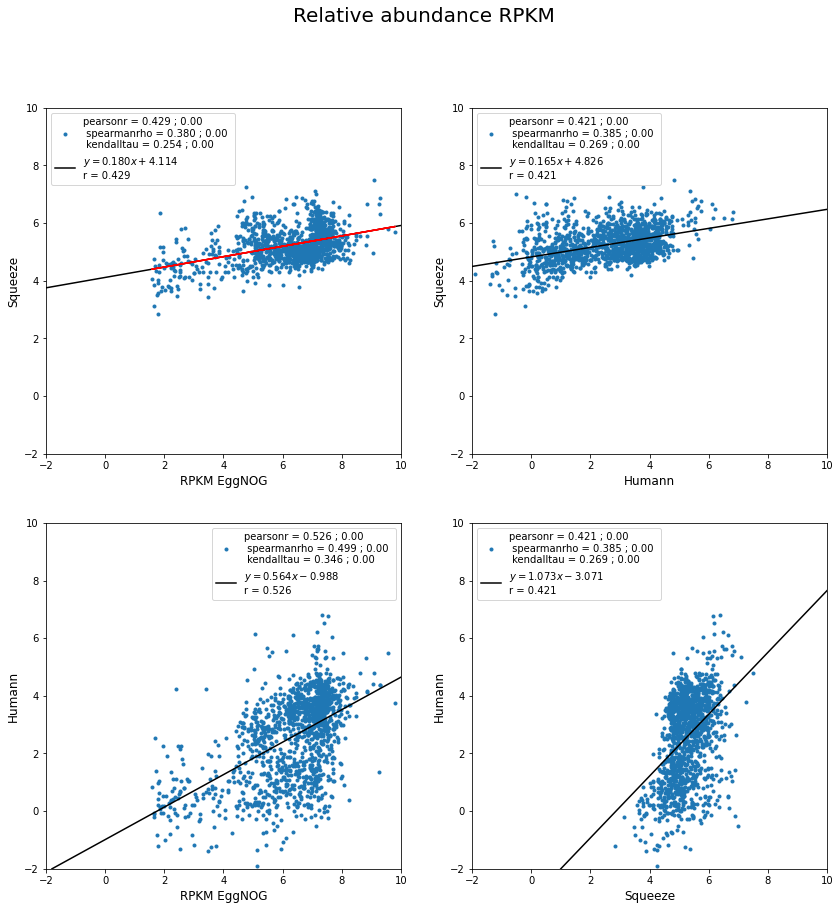

In [41]:
s0505_0101_eggnog_squeeze = merge_dicts_common(s0505_0101_rpkm_eggnog, s0505_0101_squeeze, common_list)
s0505_0101_eggnog_humann = merge_dicts_common(s0505_0101_rpkm_eggnog, s0505_0101_humann, common_list)
s0505_0101_humann_squeeze = merge_dicts_common(s0505_0101_humann, s0505_0101_squeeze, common_list)
s0505_0101_squeeze_humann = merge_dicts_common(s0505_0101_squeeze, s0505_0101_humann, common_list)

x_eggsq,y_eggsq = get_xy(s0505_0101_eggnog_squeeze)
x_egghu, y_egghu = get_xy(s0505_0101_eggnog_humann) 
x_husq, y_husq = get_xy(s0505_0101_humann_squeeze)

from scipy import stats
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(2, 2, figsize = (14,14))
fig.suptitle('Relative abundance RPKM', fontsize=20)


# reg = LinearRegression().fit(np.array(np.log(x_eggsq)), np.array(np.log(y_eggsq)), sample_weight=None)
# b = reg.intercept_
# m = reg.coef_[0]
# r = 0.5

model = LinearRegression()
x = np.array(np.log(x_eggsq))
y = np.array(np.log(y_eggsq))
model.fit(x.reshape(-1, 1), y)

r, p = stats.pearsonr(np.log(x_eggsq), np.log(y_eggsq))
rho, p2 = stats.spearmanr(np.log(x_eggsq), np.log(y_eggsq))
tau, p3 = stats.kendalltau(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].plot(np.log(x_eggsq), np.log(y_eggsq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')
# fig.set_label(f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')

axs[0,0].plot(x, model.predict(x.reshape(-1, 1)), color='red')
axs[0,0].legend()
# axs[0,0].set_yscale('log')
# axs[0,0].set_xscale('log')
axs[0,0].set_xlim(-2, 10)
axs[0,0].set_ylim(-2, 10)
axs[0,0].set_ylabel('Squeeze', fontsize = 12)
axs[0,0].set_xlabel('RPKM EggNOG', fontsize = 12)
   


#axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.')

r, p = stats.pearsonr(np.log(x_husq), np.log(y_husq))
rho, p2 = stats.spearmanr(np.log(x_husq), np.log(y_husq))
tau, p3 = stats.kendalltau(np.log(x_husq), np.log(y_husq))
axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_husq), np.log(y_husq))
axs[0,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,1].legend()
# axs[0,1].set_yscale('log')
# axs[0,1].set_xscale('log')
axs[0,1].set_xlim(-2, 10)
axs[0,1].set_ylim(-2, 10)
axs[0,1].set_ylabel('Squeeze', fontsize = 12)
axs[0,1].set_xlabel('Humann', fontsize = 12)


#axs[1,0].plot(x_egghu, y_egghu, '.')
# axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.')

r, p = stats.pearsonr(np.log(x_egghu), np.log(y_egghu))
rho, p2 = stats.spearmanr(np.log(x_egghu), np.log(y_egghu))
tau, p3 = stats.kendalltau(np.log(x_egghu), np.log(y_egghu))
axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_egghu), np.log(y_egghu))
axs[1,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,0].legend()
# # axs[1,0].set_yscale('log')
# # axs[1,0].set_xscale('log')
# # axs[1,0].set_xlim(0.0000001, 0.011)
# # axs[1,0].set_ylim(0.0000001, 0.011)
axs[1,0].set_xlim(-2, 10)
axs[1,0].set_ylim(-2, 10)
axs[1,0].set_xlabel('RPKM EggNOG', fontsize = 12)
axs[1,0].set_ylabel('Humann', fontsize = 12)

# axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.')

r, p = stats.pearsonr(np.log(y_husq), np.log(x_husq))
rho, p2 = stats.spearmanr(np.log(y_husq), np.log(x_husq))
tau, p3 = stats.kendalltau(np.log(y_husq), np.log(x_husq))
axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(y_husq), np.log(x_husq))
axs[1,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,1].legend()
# axs[1,1].set_yscale('log')
# axs[1,1].set_xscale('log')
axs[1,1].set_xlim(-2, 10)
axs[1,1].set_ylim(-2, 10)
axs[1,1].set_ylabel('Humann', fontsize = 12)
axs[1,1].set_xlabel('Squeeze', fontsize = 12)

{'K00001': 0.0, 'K00002': 0.0, 'K00003': 51.996354709895165, 'K00004': 0.0, 'K00005': 21.61542917064375, 'K00006': 0.0, 'K00008': 0.0, 'K00009': 7.9556292198411676, 'K00010': 0.0, 'K00012': 659.5520600348915, 'K00013': 887.1092517462334, 'K00014': 1384.9388822278704, 'K00015': 0.0, 'K00016': 678.32851763529, 'K00018': 87.7366813101324, 'K00019': 0.0, 'K00020': 0.0, 'K00021': 0.0, 'K00024': 435.4787985578407, 'K00027': 140.79957210391342, 'K00029': 0.0, 'K00030': 98.67067276369814, 'K00031': 0.0, 'K00033': 0.0, 'K00036': 410.6955130902646, 'K00040': 1264.7142082341275, 'K00041': 1390.5257300427006, 'K00042': 12.206385658143471, 'K00045': 0.0, 'K00046': 18.14997118751193, 'K00048': 0.0, 'K00052': 2471.409524813311, 'K00053': 3242.9146293248045, 'K00054': 0.0, 'K00057': 645.0313514923081, 'K00058': 392.2444155756259, 'K00059': 1949.3424983175232, 'K00060': 0.0, 'K00062': 0.0, 'K00065': 29.117576526804662, 'K00067': 219.14114329005443, 'K00068': 0.0, 'K00073': 0.0, 'K00074': 996.7843716146

Text(0.5, 0, 'Squeeze')

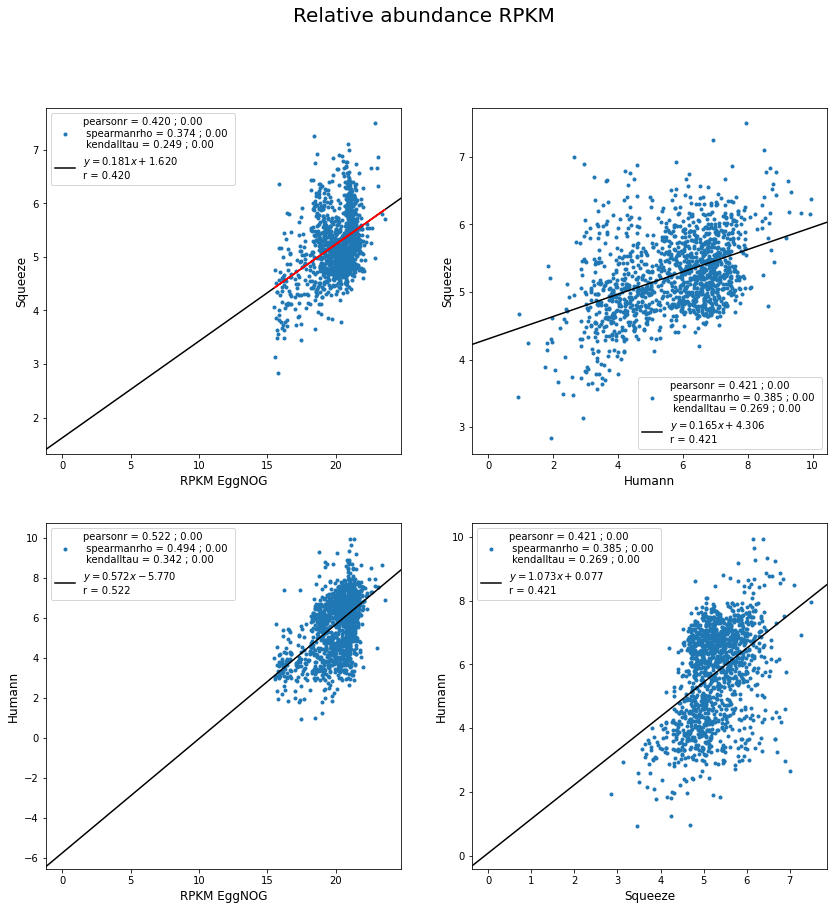

In [39]:
s0505_0101_eggnog_squeeze = merge_dicts_common(s0505_0101_noun_eggnog, s0505_0101_squeeze, common_list)
s0505_0101_eggnog_humann = merge_dicts_common(s0505_0101_noun_eggnog, s0505_0101_noun_humann, common_list)
s0505_0101_humann_squeeze = merge_dicts_common(s0505_0101_noun_humann, s0505_0101_squeeze, common_list)
s0505_0101_squeeze_humann = merge_dicts_common(s0505_0101_squeeze, s0505_0101_noun_humann, common_list)

print(s0505_0101_noun_humann)

x_eggsq,y_eggsq = get_xy(s0505_0101_eggnog_squeeze)
x_egghu, y_egghu = get_xy(s0505_0101_eggnog_humann) 
x_husq, y_husq = get_xy(s0505_0101_humann_squeeze)

from scipy import stats
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(2, 2, figsize = (14,14))
fig.suptitle('Relative abundance RPKM', fontsize=20)


# reg = LinearRegression().fit(np.array(np.log(x_eggsq)), np.array(np.log(y_eggsq)), sample_weight=None)
# b = reg.intercept_
# m = reg.coef_[0]
# r = 0.5

model = LinearRegression()
x = np.array(np.log(x_eggsq))
y = np.array(np.log(y_eggsq))
model.fit(x.reshape(-1, 1), y)

r, p = stats.pearsonr(np.log(x_eggsq), np.log(y_eggsq))
rho, p2 = stats.spearmanr(np.log(x_eggsq), np.log(y_eggsq))
tau, p3 = stats.kendalltau(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].plot(np.log(x_eggsq), np.log(y_eggsq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')
# fig.set_label(f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')

axs[0,0].plot(x, model.predict(x.reshape(-1, 1)), color='red')
axs[0,0].legend()
# axs[0,0].set_yscale('log')
# axs[0,0].set_xscale('log')
# axs[0,0].set_xlim(0.0000001, 0.011)
# axs[0,0].set_ylim(0.0000001, 0.011)
axs[0,0].set_ylabel('Squeeze', fontsize = 12)
axs[0,0].set_xlabel('RPKM EggNOG', fontsize = 12)
   


#axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.')

r, p = stats.pearsonr(np.log(x_husq), np.log(y_husq))
rho, p2 = stats.spearmanr(np.log(x_husq), np.log(y_husq))
tau, p3 = stats.kendalltau(np.log(x_husq), np.log(y_husq))
axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_husq), np.log(y_husq))
axs[0,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,1].legend()
# axs[0,1].set_yscale('log')
# axs[0,1].set_xscale('log')
# axs[0,1].set_xlim(0.0000001, 0.011)
# axs[0,1].set_ylim(0.0000001, 0.011)
axs[0,1].set_ylabel('Squeeze', fontsize = 12)
axs[0,1].set_xlabel('Humann', fontsize = 12)


#axs[1,0].plot(x_egghu, y_egghu, '.')
# axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.')

r, p = stats.pearsonr(np.log(x_egghu), np.log(y_egghu))
rho, p2 = stats.spearmanr(np.log(x_egghu), np.log(y_egghu))
tau, p3 = stats.kendalltau(np.log(x_egghu), np.log(y_egghu))
axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_egghu), np.log(y_egghu))
axs[1,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,0].legend()
# # axs[1,0].set_yscale('log')
# # axs[1,0].set_xscale('log')
# # axs[1,0].set_xlim(0.0000001, 0.011)
# # axs[1,0].set_ylim(0.0000001, 0.011)
# axs[1,0].set_xlim(-16, -5)
# axs[1,0].set_ylim(-16, -5)
axs[1,0].set_xlabel('RPKM EggNOG', fontsize = 12)
axs[1,0].set_ylabel('Humann', fontsize = 12)

# axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.')

r, p = stats.pearsonr(np.log(y_husq), np.log(x_husq))
rho, p2 = stats.spearmanr(np.log(y_husq), np.log(x_husq))
tau, p3 = stats.kendalltau(np.log(y_husq), np.log(x_husq))
axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(y_husq), np.log(x_husq))
axs[1,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,1].legend()
# axs[1,1].set_yscale('log')
# axs[1,1].set_xscale('log')
# axs[1,1].set_xlim(0.0000001, 0.011)
# axs[1,1].set_ylim(0.0000001, 0.011)
axs[1,1].set_ylabel('Humann', fontsize = 12)
axs[1,1].set_xlabel('Squeeze', fontsize = 12)

Text(0.5, 0, 'Squeeze')

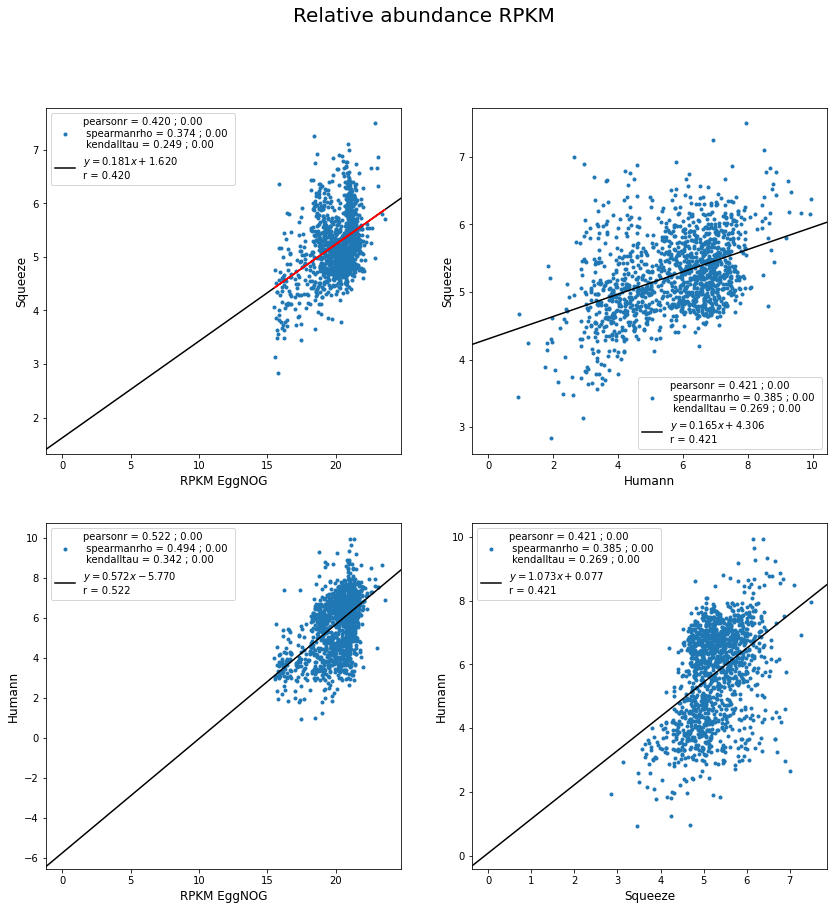

In [40]:
s0505_0101_eggnog_squeeze = merge_dicts_common(s0505_0101_noun_eggnog, s0505_0101_squeeze, common_list)
s0505_0101_eggnog_humann = merge_dicts_common(s0505_0101_noun_eggnog, s0505_0101_noun_humann, common_list)
s0505_0101_humann_squeeze = merge_dicts_common(s0505_0101_noun_humann, s0505_0101_squeeze, common_list)
s0505_0101_squeeze_humann = merge_dicts_common(s0505_0101_squeeze, s0505_0101_noun_humann, common_list)

x_eggsq,y_eggsq = get_xy(s0505_0101_eggnog_squeeze)
x_egghu, y_egghu = get_xy(s0505_0101_eggnog_humann) 
x_husq, y_husq = get_xy(s0505_0101_humann_squeeze)

from scipy import stats
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(2, 2, figsize = (14,14))
fig.suptitle('Relative abundance RPKM', fontsize=20)


# reg = LinearRegression().fit(np.array(np.log(x_eggsq)), np.array(np.log(y_eggsq)), sample_weight=None)
# b = reg.intercept_
# m = reg.coef_[0]
# r = 0.5

model = LinearRegression()
x = np.array(np.log(x_eggsq))
y = np.array(np.log(y_eggsq))
model.fit(x.reshape(-1, 1), y)

r, p = stats.pearsonr(np.log(x_eggsq), np.log(y_eggsq))
rho, p2 = stats.spearmanr(np.log(x_eggsq), np.log(y_eggsq))
tau, p3 = stats.kendalltau(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].plot(np.log(x_eggsq), np.log(y_eggsq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')
# fig.set_label(f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')

axs[0,0].plot(x, model.predict(x.reshape(-1, 1)), color='red')
axs[0,0].legend()
# axs[0,0].set_yscale('log')
# axs[0,0].set_xscale('log')
# axs[0,0].set_xlim(0.0000001, 0.011)
# axs[0,0].set_ylim(0.0000001, 0.011)
axs[0,0].set_ylabel('Squeeze', fontsize = 12)
axs[0,0].set_xlabel('RPKM EggNOG', fontsize = 12)
   


#axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.')

r, p = stats.pearsonr(np.log(x_husq), np.log(y_husq))
rho, p2 = stats.spearmanr(np.log(x_husq), np.log(y_husq))
tau, p3 = stats.kendalltau(np.log(x_husq), np.log(y_husq))
axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_husq), np.log(y_husq))
axs[0,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,1].legend()
# axs[0,1].set_yscale('log')
# axs[0,1].set_xscale('log')
# axs[0,1].set_xlim(0.0000001, 0.011)
# axs[0,1].set_ylim(0.0000001, 0.011)
axs[0,1].set_ylabel('Squeeze', fontsize = 12)
axs[0,1].set_xlabel('Humann', fontsize = 12)


#axs[1,0].plot(x_egghu, y_egghu, '.')
# axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.')

r, p = stats.pearsonr(np.log(x_egghu), np.log(y_egghu))
rho, p2 = stats.spearmanr(np.log(x_egghu), np.log(y_egghu))
tau, p3 = stats.kendalltau(np.log(x_egghu), np.log(y_egghu))
axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_egghu), np.log(y_egghu))
axs[1,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,0].legend()
# # axs[1,0].set_yscale('log')
# # axs[1,0].set_xscale('log')
# # axs[1,0].set_xlim(0.0000001, 0.011)
# # axs[1,0].set_ylim(0.0000001, 0.011)
# axs[1,0].set_xlim(-16, -5)
# axs[1,0].set_ylim(-16, -5)
axs[1,0].set_xlabel('RPKM EggNOG', fontsize = 12)
axs[1,0].set_ylabel('Humann', fontsize = 12)

# axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.')

r, p = stats.pearsonr(np.log(y_husq), np.log(x_husq))
rho, p2 = stats.spearmanr(np.log(y_husq), np.log(x_husq))
tau, p3 = stats.kendalltau(np.log(y_husq), np.log(x_husq))
axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(y_husq), np.log(x_husq))
axs[1,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,1].legend()
# axs[1,1].set_yscale('log')
# axs[1,1].set_xscale('log')
# axs[1,1].set_xlim(0.0000001, 0.011)
# axs[1,1].set_ylim(0.0000001, 0.011)
axs[1,1].set_ylabel('Humann', fontsize = 12)
axs[1,1].set_xlabel('Squeeze', fontsize = 12)